# Image classification

## Data Collection

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-11 05:37:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.130.128, 2404:6800:4003:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   341MB/s    in 0.2s    

2020-07-11 05:37:54 (341 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Main Folder

*   Train -- cats and dogs

*   validation -- cats and dogs




In [ ]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [ ]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['cats', 'dogs']

In [ ]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))

1000
1000


In [ ]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [ ]:
## File names
train_cat_filenames = os.listdir(train_cat_dir )
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

In [ ]:
os.listdir()

['.config', 'sample_data']

## Display sample Images 

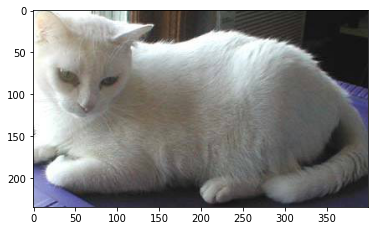

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

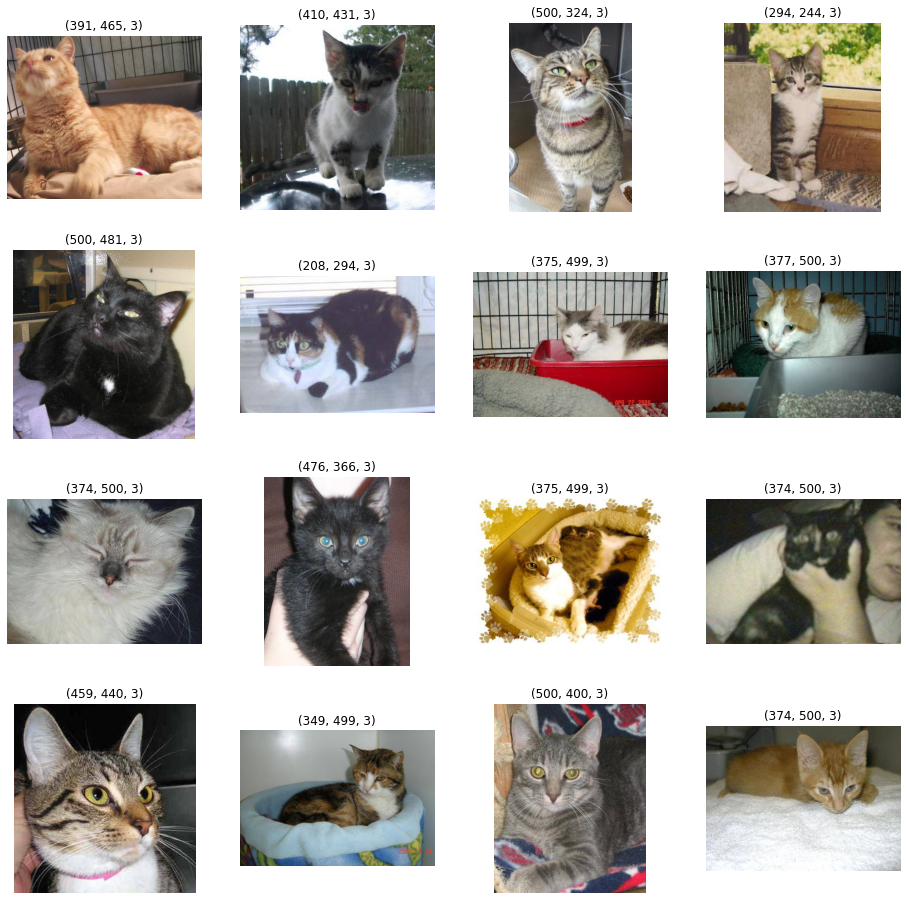

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j = 1  ## plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1


## Data Preprocessing 
Read the image data<br>
We have different shapes here.<br>
We need same shape for each image<br>
reshaing the images<br>
cats and dogs labelling<br>


## Creating Train and valiadtion data from Folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

(20, 150, 150, 3)
(20,)


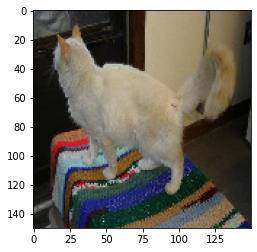

In [ ]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

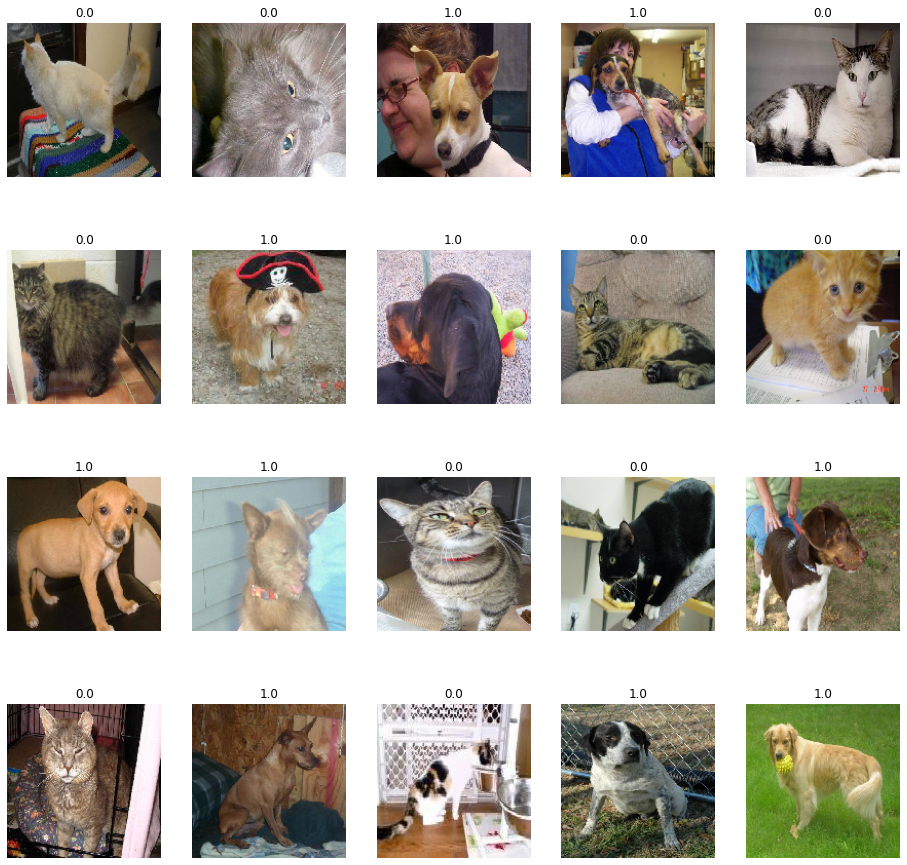

In [ ]:
plt.figure(figsize=(16,16))
pos=1
for i in range(20):
        plt.subplot(4,5,pos)
        plt.imshow(imgs[i,:,:,:])
        plt.title(labels[i])
        plt.axis("off")
        pos+=1

Build the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
model=Sequential()
#Add a conv layer followed by MaxPooling2D
model.add(Conv2D(16,3,activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#Add a conv layer followed by MaxPooling2D
model.add(Conv2D(32,3,activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#Add a conv layer followed by MaxPooling2D
model.add(Conv2D(64,3,activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#Convert the feature map into 1D array
model.add(Flatten())
#Fully connected layer
model.add(Dense(512,activation="relu"))
#Final layer
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe8d9cd0cf8>>

In [ ]:
#Compling the model
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [ ]:
#Train the model

In [ ]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 9s 92ms/step - loss: 0.8040 - accuracy: 0.5595 - val_loss: 0.6662 - val_accuracy: 0.6560
Epoch 2/15
100/100 [==============================] - 9s 91ms/step - loss: 0.6575 - accuracy: 0.6515 - val_loss: 0.6355 - val_accuracy: 0.6430
Epoch 3/15
100/100 [==============================] - 9s 91ms/step - loss: 0.5756 - accuracy: 0.7070 - val_loss: 0.6041 - val_accuracy: 0.6890
Epoch 4/15
100/100 [==============================] - 9s 90ms/step - loss: 0.5047 - accuracy: 0.7610 - val_loss: 0.6147 - val_accuracy: 0.7060
Epoch 5/15
100/100 [==============================] - 9s 91ms/step - loss: 0.4133 - accuracy: 0.8065 - val_loss: 0.6991 - val_accuracy: 0.7020
Epoch 6/15
100/100 [==============================] - 9s 91ms/step - loss: 0.3385 - accuracy: 0.8445 - val_loss: 0.6931 - val_accuracy: 0.7050
Epoch 7/15
100/100 [==============================] - 9s 90ms/step - loss: 0.2454 - accuracy: 0.8940 - val_loss: 0.7879 - val_accuracy: 0.7110

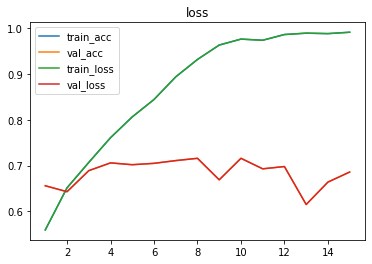

In [ ]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']


epochs=list(range(1,16))
plt.plot(epochs,train_acc,label="train_acc")
plt.plot(epochs,val_acc,label="val_acc")
plt.title('accuracy')
plt.legend()
plt.plot(epochs,train_acc,label="train_loss")
plt.plot(epochs,val_acc,label="val_loss")
plt.title('loss')
plt.legend()